### Задача 5.2

Требуется:

* Отобрать записи, соответствующие странам с минимум 30 респонеднтами в выборке
* Получить сумму zero-crossing по каждой из записей
* Провести ANOVA-анализ по аттрибутам родного языка, пола и возраста для уровня значимости $0.15$. Дискретность признака zero-crossing игнорировать.

In [1]:
from zlib import crc32
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st

import statsmodels.api as sm

from statsmodels.formula.api import ols

In [2]:
import pandas as pd
speakers = pd.read_csv('data/speakers_all.csv')
speakers.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,24.0,12.0,"koussi, senegal",balanta,balanta,male,788,senegal,True,NaN,NaN,NaN
1,18.0,10.0,"buea, cameroon",cameroon,cameroon,male,1953,cameroon,True,NaN,NaN,NaN
2,48.0,8.0,"hong, adamawa, nigeria",fulfulde,fulfulde,male,1037,nigeria,True,NaN,NaN,NaN
3,42.0,42.0,"port-au-prince, haiti",haitian,haitian,male,1165,haiti,True,NaN,NaN,NaN
4,40.0,35.0,"port-au-prince, haiti",haitian,haitian,male,1166,haiti,True,NaN,NaN,NaN


In [3]:
speakers.drop(speakers[speakers['file_missing?'] == True].index, inplace = True)
speakers.drop(['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'], axis = 1, inplace = True)

In [4]:
speakers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 32 to 2171
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2140 non-null   float64
 1   age_onset        2140 non-null   float64
 2   birthplace       2136 non-null   object 
 3   filename         2140 non-null   object 
 4   native_language  2140 non-null   object 
 5   sex              2140 non-null   object 
 6   speakerid        2140 non-null   int64  
 7   country          2135 non-null   object 
 8   file_missing?    2140 non-null   bool   
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 152.6+ KB


Отберём страны, в которых не меньше 30 респондентов. 

In [5]:
query_res = speakers[['speakerid', 'country']].groupby('country', as_index = False) \
                                              .count() \
                                              .query('speakerid >= 30') \
                                              .sort_values('speakerid', ascending = False) 

country_names = list(query_res.country)

In [6]:
speakers = speakers.query("country in @country_names")
speakers.reset_index(drop=True, inplace=True)
speakers

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?
0,20.0,5.0,"addis ababa, ethiopia",amharic1,amharic,female,6,ethiopia,False
1,29.0,19.0,"gonder, ethiopia",amharic10,amharic,female,998,ethiopia,False
2,24.0,17.0,"addis ababa, ethiopia",amharic11,amharic,female,1129,ethiopia,False
3,26.0,15.0,"addis ababa, ethiopia",amharic12,amharic,female,1130,ethiopia,False
4,28.0,6.0,"addis ababa, ethiopia",amharic13,amharic,female,1131,ethiopia,False
...,...,...,...,...,...,...,...,...,...
1040,23.0,10.0,"zhuzhou, hunan, china",xiang4,xiang,female,2163,china,False
1041,19.0,13.0,"yakutsk, russia",yakut1,yakut,female,1252,russia,False
1042,78.0,6.0,"winnipeg, manitoba, canada",yiddish2,yiddish,female,405,canada,False
1043,52.0,5.0,"brooklyn, new york, usa",yiddish3,yiddish,male,1161,usa,False


In [7]:
import os
rec_dir = 'recordings/'
audio_names = os.listdir(rec_dir)

In [8]:
import IPython.display as ipd  
import librosa
import librosa.display

In [9]:
ipd.Audio(rec_dir + audio_names[3])

In [11]:
%%time
y, sr = librosa.load(rec_dir + audio_names[3], sr = 44100)
zc = librosa.feature.zero_crossing_rate(y)

print(zc.shape[1], zc.sum())

2022 100.1650390625
Wall time: 2.66 s


Код ниже выполняется порядка 45 минут. Поэтому результат его выполнения будет сохранён в файл speakers_with_zero_crossing.csv

In [ ]:
%%time
zero_crossing_count = []
zero_crossing_sum = []

for i, audio_file in enumerate(speakers.filename):   
    y, sr = librosa.load(rec_dir + audio_file + '.mp3', sr = 44100)
    zc = librosa.feature.zero_crossing_rate(y)
    zero_crossing_count.append(zc.shape[1])
    zero_crossing_sum.append(zc.sum())
    if i % 25 == 0:
        print('I have processed {} files'.format(i))

Wall time: 47min 8s

In [12]:
speakers_zc = pd.read_csv('data/speakers_with_zero_crossing.csv')
speakers_zc

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,zero_crossing_count,zero_crossing_sum
0,20.0,5.0,"addis ababa, ethiopia",amharic1,amharic,female,6,ethiopia,False,3286,212.073730
1,29.0,19.0,"gonder, ethiopia",amharic10,amharic,female,998,ethiopia,False,4137,177.070312
2,24.0,17.0,"addis ababa, ethiopia",amharic11,amharic,female,1129,ethiopia,False,2399,202.801758
3,26.0,15.0,"addis ababa, ethiopia",amharic12,amharic,female,1130,ethiopia,False,2257,150.427734
4,28.0,6.0,"addis ababa, ethiopia",amharic13,amharic,female,1131,ethiopia,False,2811,255.820801
...,...,...,...,...,...,...,...,...,...,...,...
1040,23.0,10.0,"zhuzhou, hunan, china",xiang4,xiang,female,2163,china,False,2338,206.517578
1041,19.0,13.0,"yakutsk, russia",yakut1,yakut,female,1252,russia,False,1679,108.870117
1042,78.0,6.0,"winnipeg, manitoba, canada",yiddish2,yiddish,female,405,canada,False,1893,151.707520
1043,52.0,5.0,"brooklyn, new york, usa",yiddish3,yiddish,male,1161,usa,False,2056,104.713867


In [13]:
data = speakers_zc[['native_language', 'sex', 'age', 'zero_crossing_count']]
# data.loc[:, 'age'] = data.loc[:, 'age'].astype(int) #df.astype({'col1': 'int32'}).dtypes
# data = data.astype({'age':'int32'})
data

,native_language,sex,age,zero_crossing_count
0,amharic,female,20.0,3286
1,amharic,female,29.0,4137
2,amharic,female,24.0,2399
3,amharic,female,26.0,2257
4,amharic,female,28.0,2811
...,...,...,...,...
1040,xiang,female,23.0,2338
1041,yakut,female,19.0,1679
1042,yiddish,female,78.0,1893
1043,yiddish,male,52.0,2056


In [33]:
lm = ols('zero_crossing_count ~ C(native_language) * C(sex) * age', data=data).fit()
result = sm.stats.anova_lm(lm, typ=1)
result

,df,sum_sq,mean_sq,F,PR(>F)
C(native_language),55.0,1.320687e+08,2.401249e+06,13.969862,2.685449e-87
C(sex),1.0,2.600230e+05,2.600230e+05,1.512748,2.190367e-01
C(native_language):C(sex),55.0,1.816640e+07,3.302981e+05,1.921591,9.767795e-05
age,1.0,3.314359e+07,3.314359e+07,192.821033,6.421385e-40
C(native_language):age,55.0,4.707164e+07,8.558480e+05,4.979107,5.006122e-26
C(sex):age,1.0,2.818164e+04,2.818164e+04,0.163954,6.856370e-01
C(native_language):C(sex):age,55.0,8.016968e+06,1.457631e+05,0.848013,7.764931e-01
Residual,914.0,1.571055e+08,1.718878e+05,NaN,NaN


In [34]:
result[result['PR(>F)']<0.15].sort_values(by='PR(>F)')

,df,sum_sq,mean_sq,F,PR(>F)
C(native_language),55.0,1.320687e+08,2.401249e+06,13.969862,2.685449e-87
age,1.0,3.314359e+07,3.314359e+07,192.821033,6.421385e-40
C(native_language):age,55.0,4.707164e+07,8.558480e+05,4.979107,5.006122e-26
C(native_language):C(sex),55.0,1.816640e+07,3.302981e+05,1.921591,9.767795e-05


Видно, что факторы native_language, age являются значимыми (на уровне значимости $\alpha = 0.15$). Так же значимо межфакторное взаимодействие native_language и age и native_language и sex

Для дальнейшего анализа попробуем разделить выборку по переменной sex и провести двухфакторный дисперсионный анализ

In [16]:
lm = ols('zero_crossing_count ~ C(native_language)*age', data=data[data['sex']=='female']).fit()
result = sm.stats.anova_lm(lm, typ=1)
result

,df,sum_sq,mean_sq,F,PR(>F)
C(native_language),42.0,7.413361e+07,1.765086e+06,10.145225,1.364879e-42
age,1.0,1.961481e+07,1.961481e+07,112.740493,1.388246e-23
C(native_language):age,42.0,2.147620e+07,5.113382e+05,2.939030,1.668109e-08
Residual,437.0,7.603012e+07,1.739820e+05,NaN,NaN


In [17]:
lm = ols('zero_crossing_count ~ C(native_language)*age', data=data[data['sex']=='male']).fit()
result = sm.stats.anova_lm(lm, typ=1)
result

,df,sum_sq,mean_sq,F,PR(>F)
C(native_language),38.0,6.723391e+07,1.769313e+06,10.409603,3.935623e-42
age,1.0,1.453746e+07,1.453746e+07,85.529893,7.646376e-19
C(native_language):age,38.0,1.951280e+07,5.134948e+05,3.021102,1.959884e-08
Residual,477.0,8.107538e+07,1.699693e+05,NaN,NaN


### Вывод: 

* факторы native_language и age являются значимыми, причём судя по p-value для native_language - это наиболее значимый фактор, age также имеет очень большую значимость

* значимо межфакторное взаимодействие native_language и age и native_language и sex

* при разделении выборки по фактору sex native_language, age и их межфакторное взаимодействие остаются значимыми

In [29]:
data['native_language'].unique()

array(['amharic', 'arabic', 'armenian', 'bai', 'bavarian', 'bengali',
       'cantonese', 'dutch', 'english', 'farsi', 'finnish', 'french',
       'gan', 'gedeo', 'german', 'greek', 'gujarati', 'hadiyya', 'hindi',
       'italian', 'kambaata', 'kannada', 'khmer', 'kikongo', 'konkani',
       'korean', 'malayalam', 'mandarin', 'marathi', 'mongolian', 'naxi',
       'oriya', 'oromo', 'polish', 'portuguese', 'punjabi', 'russian',
       'spanish', 'tagalog', 'taishan', 'tamil', 'tatar', 'telugu',
       'teochew', 'tibetan', 'tigrigna', 'turkish', 'twi', 'urdu',
       'uyghur', 'vlaams', 'wu', 'xiang', 'yakut', 'yiddish', 'yupik'],
      dtype=object)

Дальше будут графики, по которым сложно (или даже невозможно) что-то понять. Но пусть они будут))

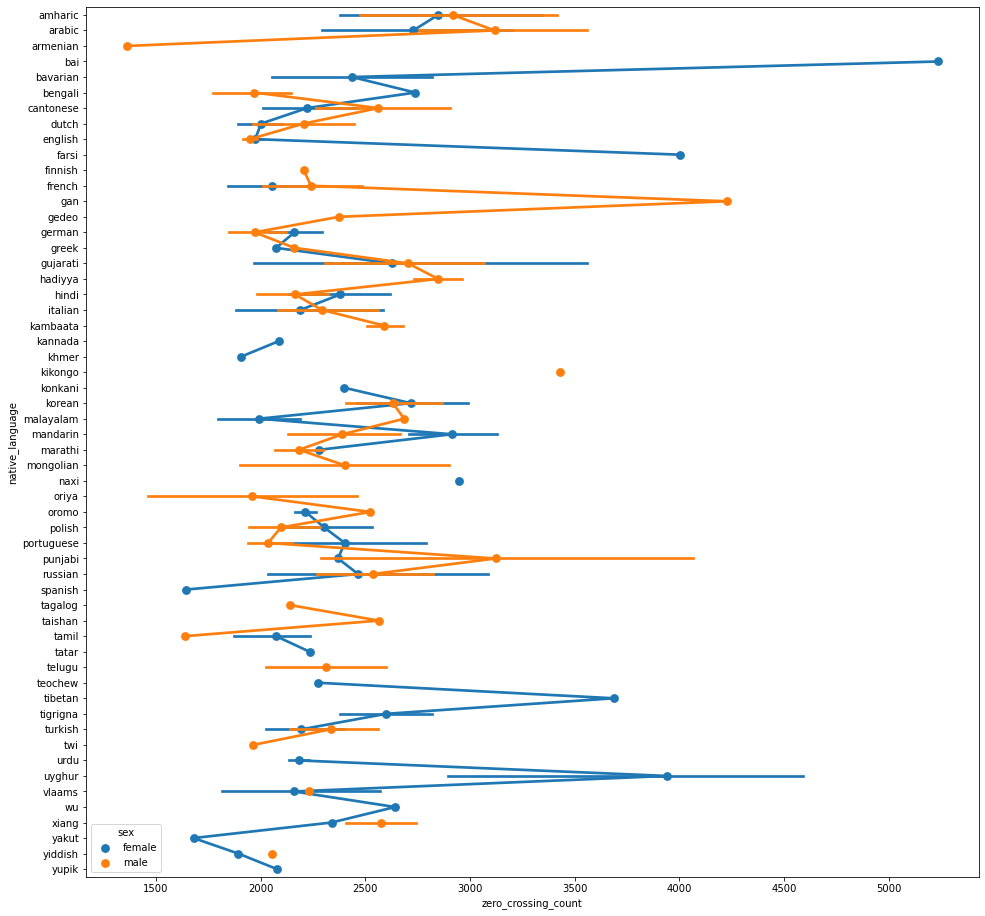

In [27]:
plt.figure(figsize=(16, 16))
_ = sns.pointplot(x='zero_crossing_count', y='native_language', data=data, hue='sex')

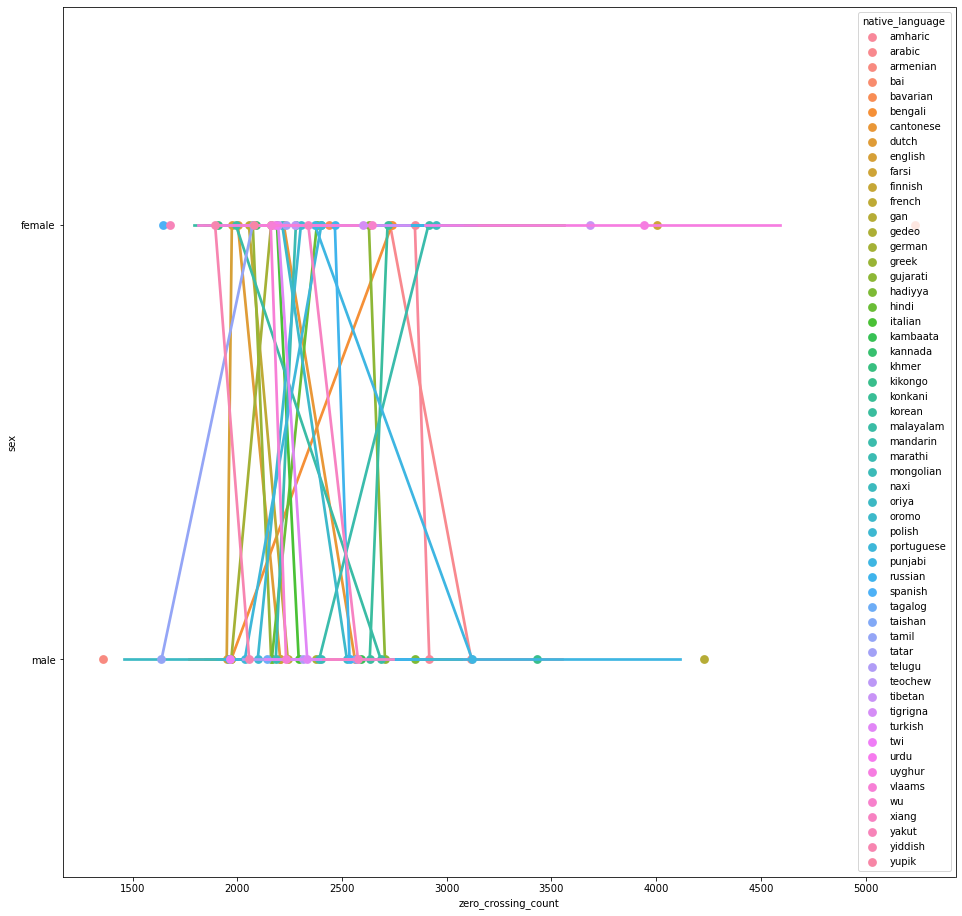

In [28]:
plt.figure(figsize=(16, 16))
_ = sns.pointplot(x='zero_crossing_count', y='sex', data=data, hue='native_language')